In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:

x = data.drop(['median_house_value'], axis=1, errors='ignore')

y=data['median_house_value' ] 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [8]:
train_data=x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

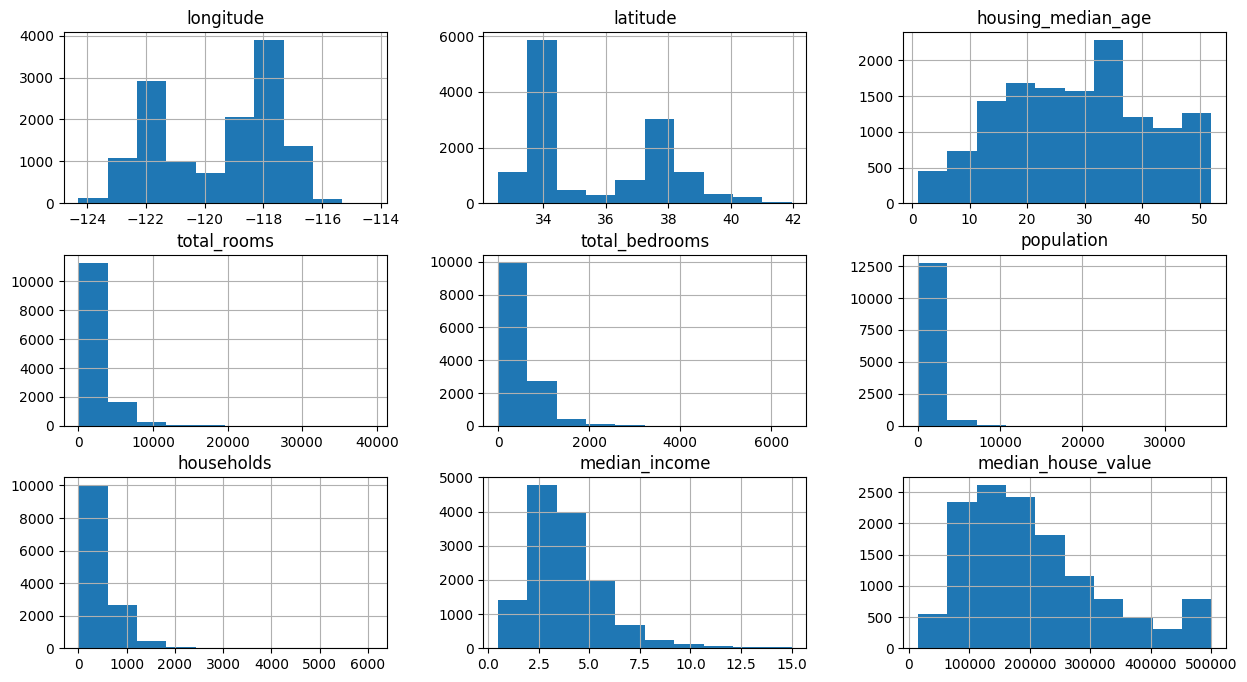

In [9]:
train_data.hist(figsize=(15,8))

In [35]:
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

<Axes: >

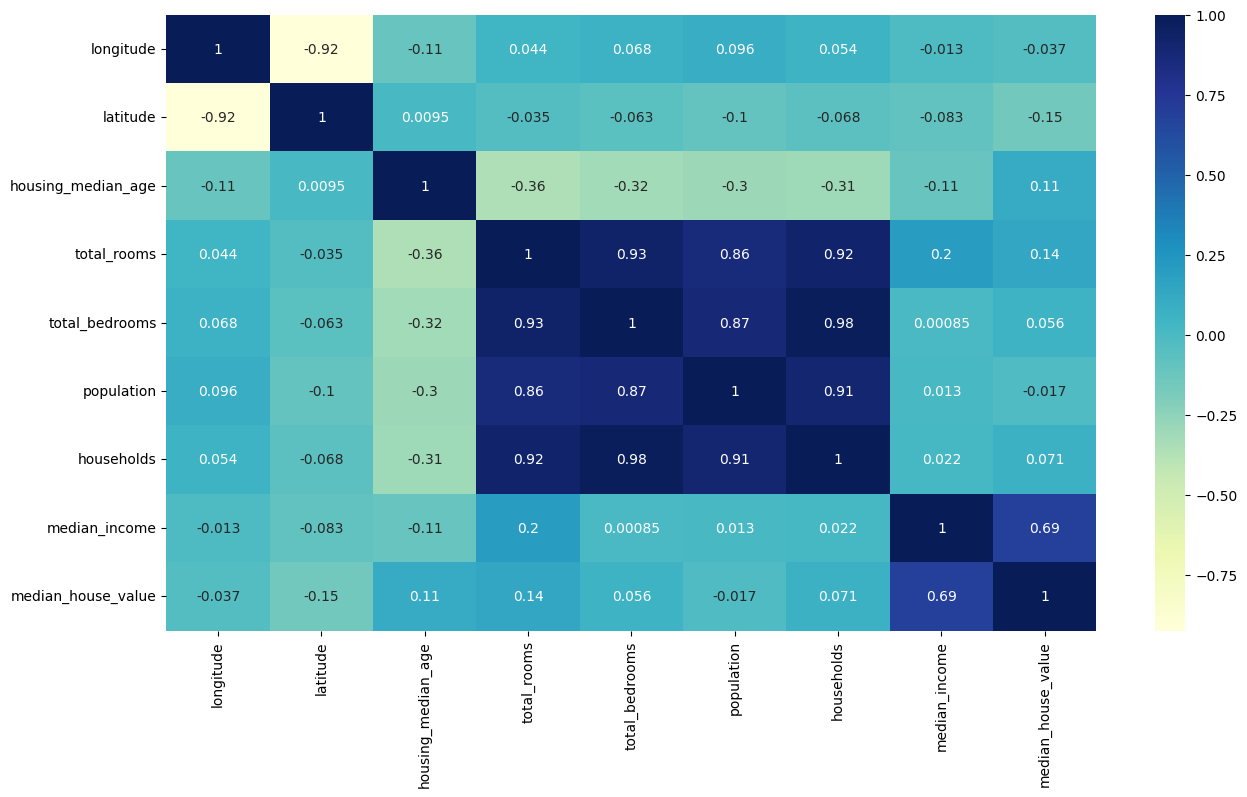

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

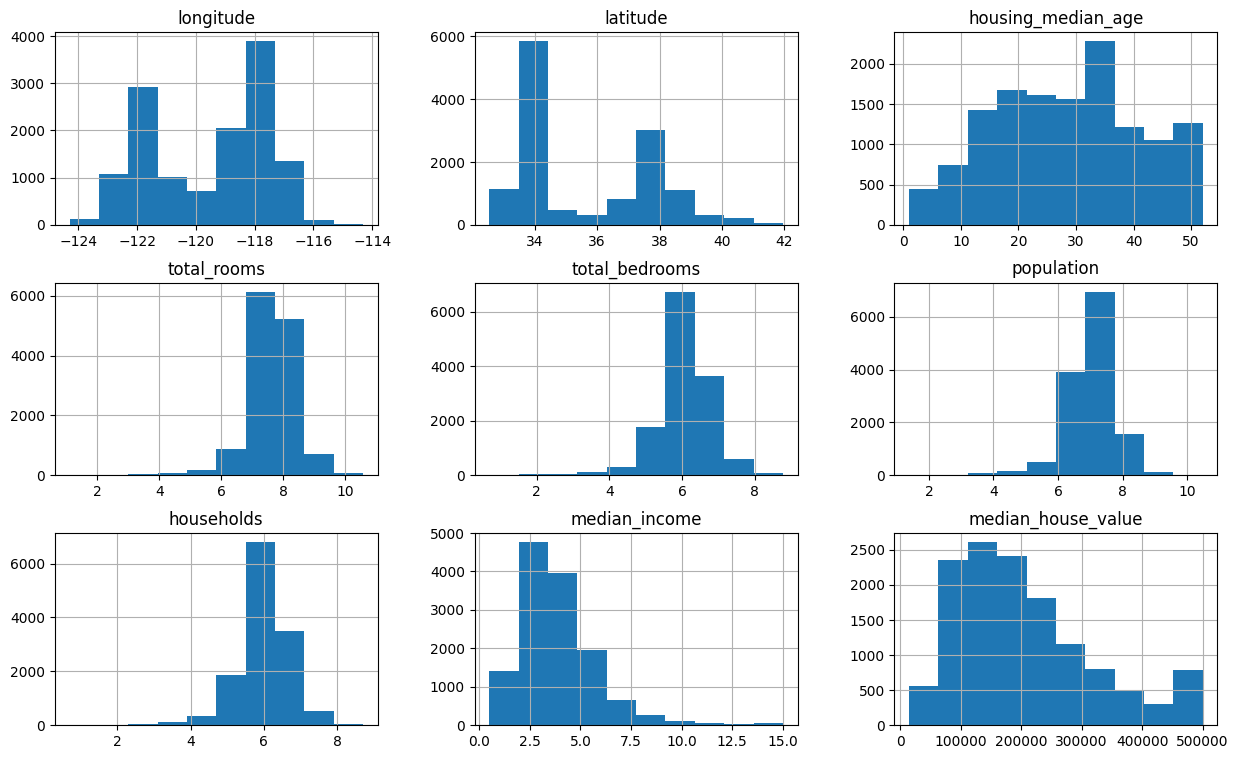

In [13]:
train_data.hist(figsize=(15,9))

In [24]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis =1 )

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13351,-117.62,34.02,9.0,8.358432,6.376727,7.732369,6.380123,5.5632,195100.0,0,1,0,0,0
136,-122.19,37.83,29.0,7.491088,5.605802,6.495266,5.598422,6.8538,368900.0,0,0,0,1,0
15439,-117.23,33.20,21.0,7.734121,5.888878,6.907755,5.877736,4.8929,212500.0,1,0,0,0,0
10239,-117.88,33.90,15.0,7.441907,6.171701,6.633318,6.173786,3.5333,114400.0,1,0,0,0,0
4100,-118.37,34.14,21.0,8.449128,7.057898,7.557473,6.998510,3.7986,367700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,-118.58,34.18,28.0,6.812345,4.962845,5.910797,4.969813,5.6159,340500.0,1,0,0,0,0
18544,-122.03,36.97,52.0,6.001415,4.290459,5.303305,4.304065,1.6923,262500.0,0,0,0,0,1
5441,-118.44,34.00,44.0,7.494986,5.869297,6.728629,5.752573,4.7500,355800.0,1,0,0,0,0
18884,-122.25,38.10,52.0,7.372746,5.921578,6.706862,5.880533,2.1411,97200.0,0,0,0,1,0


<Axes: >

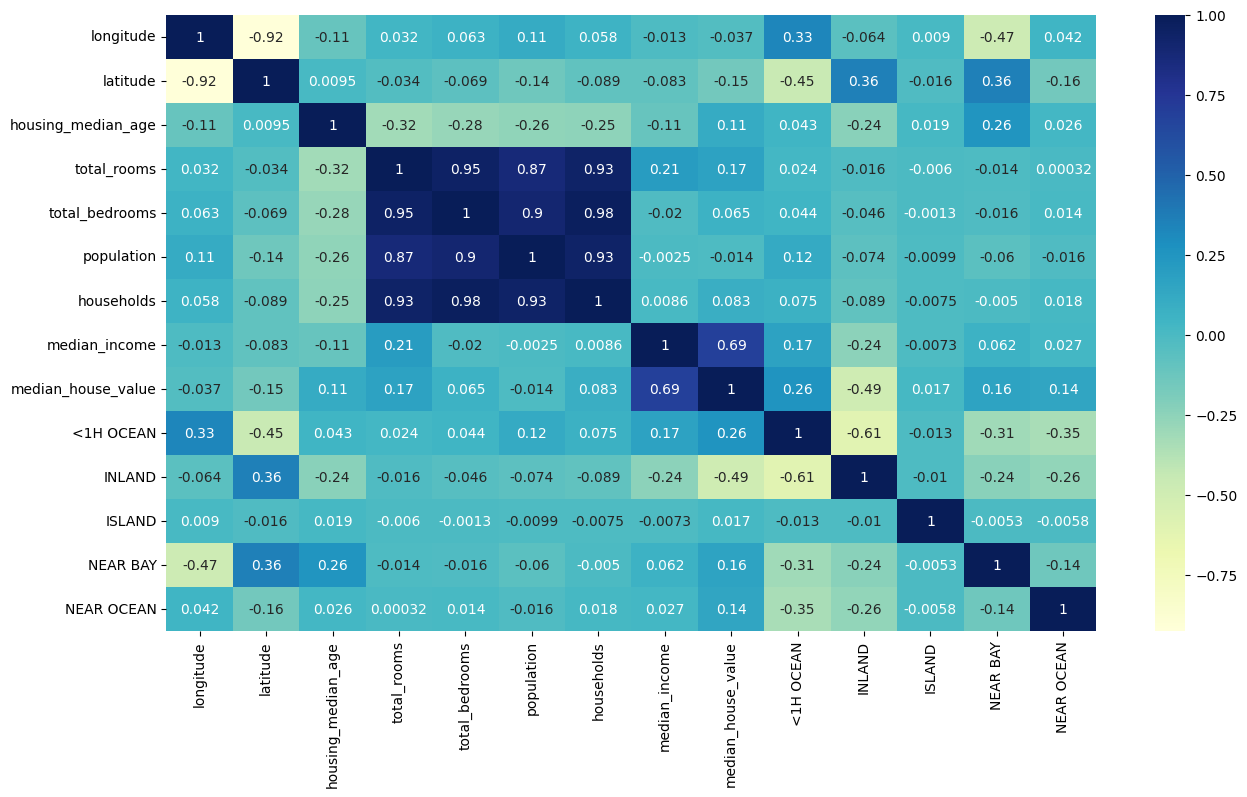

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

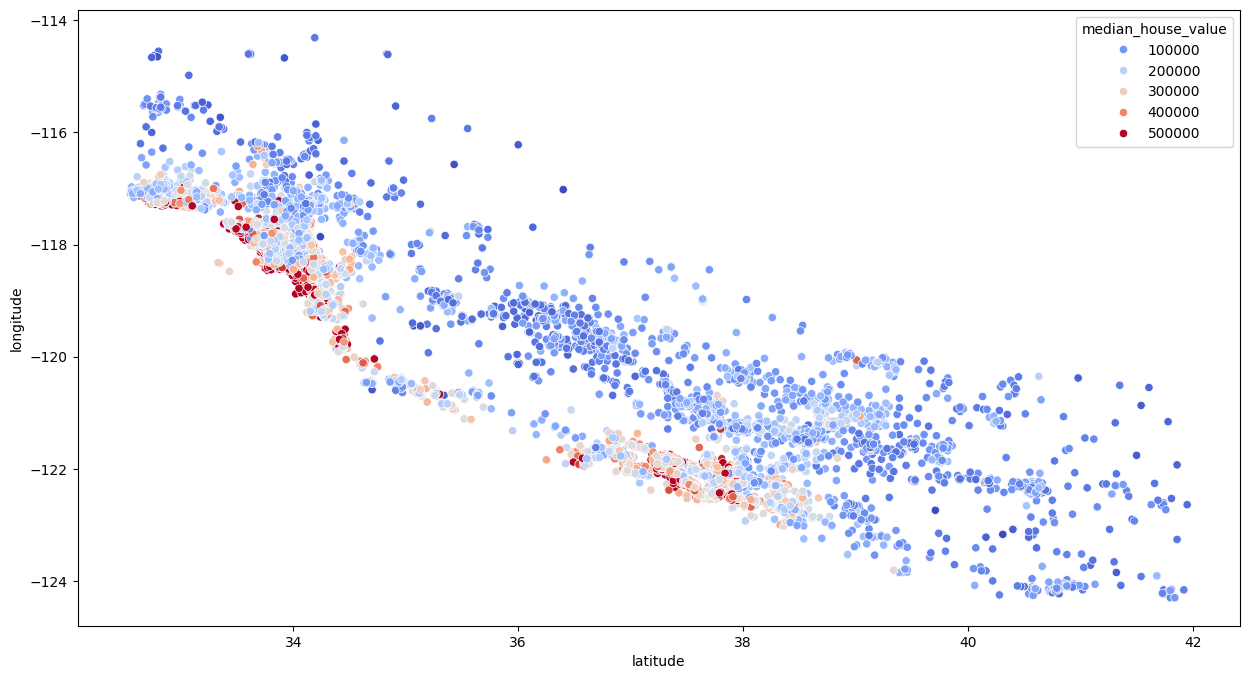

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data ,hue="median_house_value" , palette="coolwarm")

In [33]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']

<Axes: >

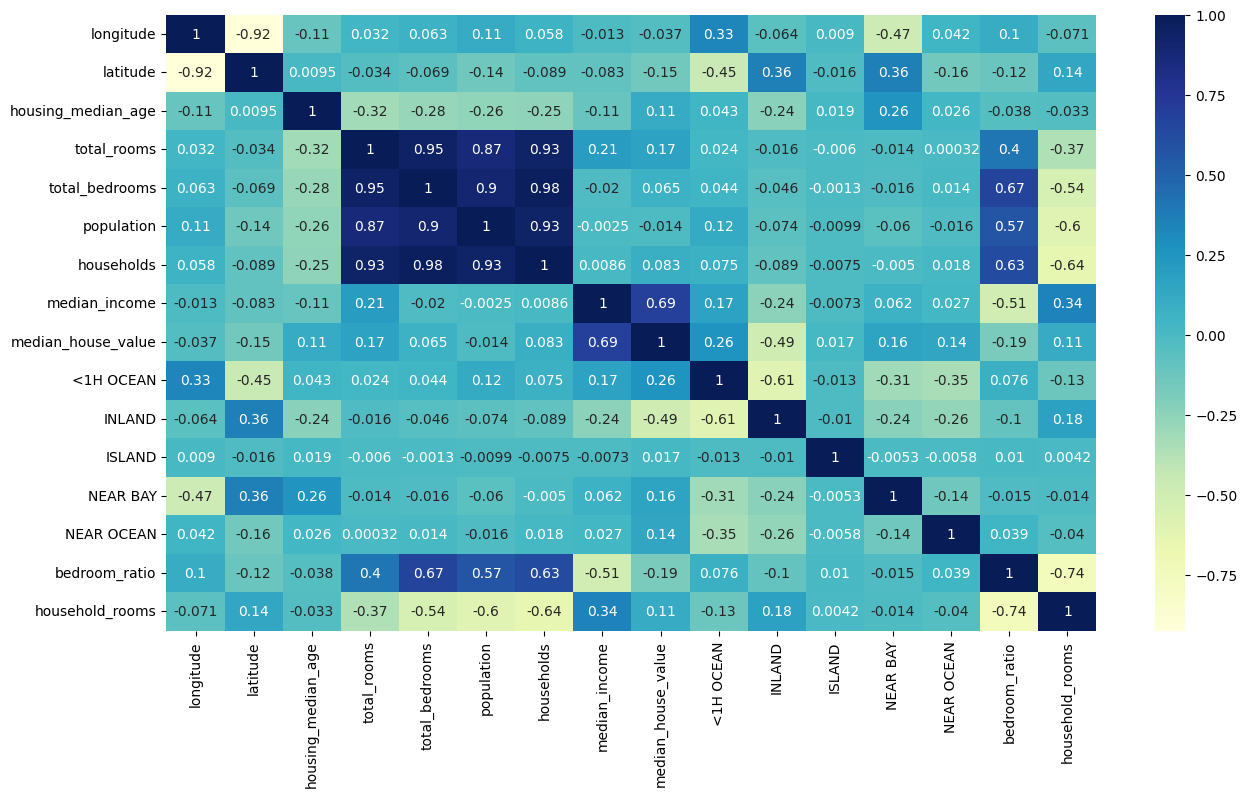

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [37]:
from sklearn.linear_model import LinearRegression
x_train , y_train = train_data.drop(['median_house_value'] , axis=1) ,train_data ['median_house_value']
reg =LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [43]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis =1 )
test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms'] / test_data['households']
x_test , y_test = test_data.drop(['median_house_value'] , axis=1) ,test_data ['median_house_value']

In [44]:
test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7069,-118.02,33.95,36.0,7.398174,5.690359,6.682109,5.648974,4.2292,179500.0,1,0,0,0,0,0.769157,1.309649
11407,-117.96,33.71,19.0,7.393263,5.402677,6.663133,5.433722,4.5962,304500.0,1,0,0,0,0,0.730757,1.360626
16028,-122.45,37.73,52.0,7.618742,6.052089,7.085064,6.066108,5.0634,264200.0,0,0,0,1,0,0.794369,1.255952
2032,-119.76,36.73,46.0,7.206377,5.645447,6.751101,5.590987,1.8723,52600.0,0,1,0,0,0,0.783396,1.288928
14221,-117.06,32.66,24.0,7.858641,6.198479,7.388946,6.129050,3.5066,133400.0,0,0,0,0,1,0.788747,1.282196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,-117.94,33.78,34.0,7.873978,6.150603,7.251345,6.111467,4.7731,199200.0,1,0,0,0,0,0.781130,1.288394
9677,-118.98,37.65,18.0,7.493317,6.033086,6.182085,5.342334,4.5375,169800.0,0,1,0,0,0,0.805129,1.402630
10331,-117.77,33.84,5.0,8.385032,6.573680,7.556951,6.609349,6.7274,266400.0,1,0,0,0,0,0.783978,1.268662
17166,-122.22,37.40,32.0,7.739794,5.662960,6.703188,5.648974,15.0001,500001.0,0,0,0,0,1,0.731668,1.370124


In [45]:
reg.score(x_test , y_test)

0.6640006055400134